In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data  = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/vgsales.csv')

In [4]:
data.head()

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,70,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,29.08,3.58,6.81,0.77,40.24
1,90,Minecraft,PC,2010.0,Mojang,Mojang AB,10.0,0.00,0.00,0.00,0.00,0.00
2,333,Grand Theft Auto IV,X360,2008.0,Rockstar Games,Rockstar North,10.0,6.80,3.11,0.14,1.04,11.09
3,354,Grand Theft Auto IV,PS3,2008.0,Rockstar Games,Rockstar North,10.0,4.79,3.73,0.44,1.62,10.57
4,439,Super Mario Kart,SNES,1992.0,Nintendo,Nintendo EAD,10.0,3.54,1.24,3.81,0.18,8.76


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17820 entries, 0 to 17819
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          17820 non-null  int64  
 1   Name          17820 non-null  object 
 2   Platform      17820 non-null  object 
 3   Year          17350 non-null  float64
 4   Publisher     17820 non-null  object 
 5   Developer     17820 non-null  object 
 6   Critic_Score  17820 non-null  float64
 7   NA_Sales      17820 non-null  float64
 8   PAL_Sales     17820 non-null  float64
 9   JP_Sales      17820 non-null  float64
 10  Other_Sales   17820 non-null  float64
 11  Global_Sales  17820 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [6]:
data.describe()

,Rank,Year,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
count,17820.000000,17350.000000,17820.000000,17820.000000,17820.000000,17820.000000,17820.000000,17820.000000
mean,9005.500000,2007.300576,1.819377,0.261822,0.149512,0.075851,0.048596,0.535873
std,5196.138636,7.245191,3.238497,0.805798,0.524200,0.307184,0.186877,1.560012
min,11.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4505.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,9005.500000,2008.000000,0.000000,0.080000,0.020000,0.000000,0.010000,0.160000
75%,13505.250000,2012.000000,0.000000,0.230000,0.110000,0.040000,0.030000,0.470000
max,18000.000000,2079.000000,10.000000,41.360000,29.020000,10.220000,10.570000,82.650000


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            470
Publisher         0
Developer         0
Critic_Score      0
NA_Sales          0
PAL_Sales         0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
data['Year'].describe()

count    17350.000000
mean      2007.300576
std          7.245191
min       1980.000000
25%       2003.000000
50%       2008.000000
75%       2012.000000
max       2079.000000
Name: Year, dtype: float64

In [9]:
data['Int Sales'] = data['Global_Sales'] - data['NA_Sales']

In [10]:
data.drop_duplicates

<bound method DataFrame.drop_duplicates of         Rank                                  Name Platform    Year  \
0         70                     Super Mario Bros.      NES  1985.0   
1         90                             Minecraft       PC  2010.0   
2        333                   Grand Theft Auto IV     X360  2008.0   
3        354                   Grand Theft Auto IV      PS3  2008.0   
4        439                      Super Mario Kart     SNES  1992.0   
...      ...                                   ...      ...     ...   
17815  17996                  Hakuouki: Zuisouroku      PS2  2009.0   
17816  17997          World Championship Pool 2004       XB  2003.0   
17817  17998  Derby Tsuku 5: Derby Uma o Tsukurou!      PS2  2006.0   
17818  17999                            Punch Line      PS4  2018.0   
17819  18000    Jikkyou Powerful Major League 2009      Wii  2009.0   

              Publisher              Developer  Critic_Score  NA_Sales  \
0            Nintendo         

In [11]:
data.dropna

<bound method DataFrame.dropna of         Rank                                  Name Platform    Year  \
0         70                     Super Mario Bros.      NES  1985.0   
1         90                             Minecraft       PC  2010.0   
2        333                   Grand Theft Auto IV     X360  2008.0   
3        354                   Grand Theft Auto IV      PS3  2008.0   
4        439                      Super Mario Kart     SNES  1992.0   
...      ...                                   ...      ...     ...   
17815  17996                  Hakuouki: Zuisouroku      PS2  2009.0   
17816  17997          World Championship Pool 2004       XB  2003.0   
17817  17998  Derby Tsuku 5: Derby Uma o Tsukurou!      PS2  2006.0   
17818  17999                            Punch Line      PS4  2018.0   
17819  18000    Jikkyou Powerful Major League 2009      Wii  2009.0   

              Publisher              Developer  Critic_Score  NA_Sales  \
0            Nintendo           Nintend

In [12]:
data.head()

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Int Sales
0,70,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,29.08,3.58,6.81,0.77,40.24,11.16
1,90,Minecraft,PC,2010.0,Mojang,Mojang AB,10.0,0.00,0.00,0.00,0.00,0.00,0.00
2,333,Grand Theft Auto IV,X360,2008.0,Rockstar Games,Rockstar North,10.0,6.80,3.11,0.14,1.04,11.09,4.29
3,354,Grand Theft Auto IV,PS3,2008.0,Rockstar Games,Rockstar North,10.0,4.79,3.73,0.44,1.62,10.57,5.78
4,439,Super Mario Kart,SNES,1992.0,Nintendo,Nintendo EAD,10.0,3.54,1.24,3.81,0.18,8.76,5.22


In [13]:
data.sort_values(by = 'Global_Sales', ascending = False).head()

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Int Sales
1960,26,Wii Sports,Wii,2006.0,Nintendo,Nintendo EAD,7.7,41.36,29.02,3.77,8.51,82.65,41.29
0,70,Super Mario Bros.,NES,1985.0,Nintendo,Nintendo EAD,10.0,29.08,3.58,6.81,0.77,40.24,11.16
1221,78,Mario Kart Wii,Wii,2008.0,Nintendo,Nintendo EAD,8.2,15.91,12.92,3.80,3.35,35.98,20.07
1489,91,Wii Sports Resort,Wii,2009.0,Nintendo,Nintendo EAD,8.0,15.61,10.99,3.29,3.02,32.90,17.29
86,94,Pokémon Red / Green / Blue Version,GB,1998.0,Nintendo,Game Freak,9.4,11.27,8.89,10.22,1.00,31.37,20.10


Text(0.5, 1.0, 'Games by Platform')

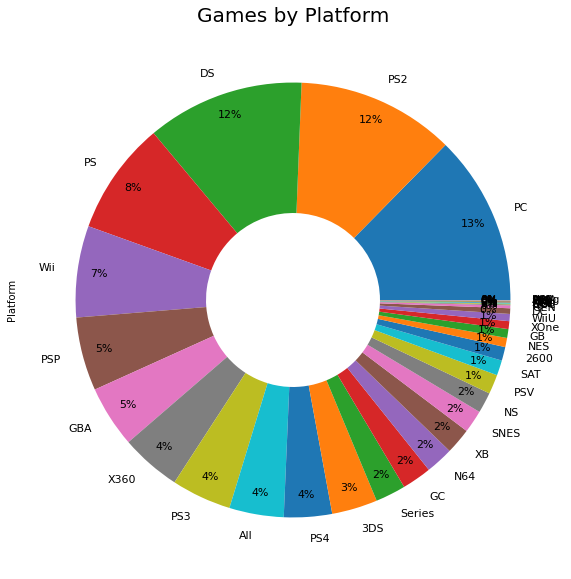

In [14]:
data.groupby("Name").first()["Platform"].value_counts().plot(kind="pie",autopct="%.0f%%",figsize=(15,10),wedgeprops=dict(width=0.6),pctdistance=0.9, fontsize=11)
plt.title('Games by Platform', fontsize = 20)

In [15]:
global_sales = data[['Global_Sales']]

In [16]:
data = data[(data['Year'] <= 2022) & (data['Rank'] < 10000)]
data = data[data['Global_Sales'] != 0]
data.describe()

,Rank,Year,Critic_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales,Int Sales
count,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000,7920.000000
mean,5359.534470,2006.366288,2.944672,0.540278,0.318479,0.146860,0.102986,1.108504,0.568226
std,2727.352456,6.737051,3.780156,1.147824,0.752257,0.448187,0.270470,2.208705,1.211305
min,26.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
25%,3022.500000,2002.000000,0.000000,0.140000,0.040000,0.000000,0.020000,0.320000,0.120000
50%,5412.500000,2007.000000,0.000000,0.270000,0.130000,0.000000,0.040000,0.540000,0.260000
75%,7699.250000,2011.000000,7.300000,0.550000,0.320000,0.100000,0.090000,1.100000,0.560000
max,9999.000000,2020.000000,10.000000,41.360000,29.020000,10.220000,10.570000,82.650000,41.290000


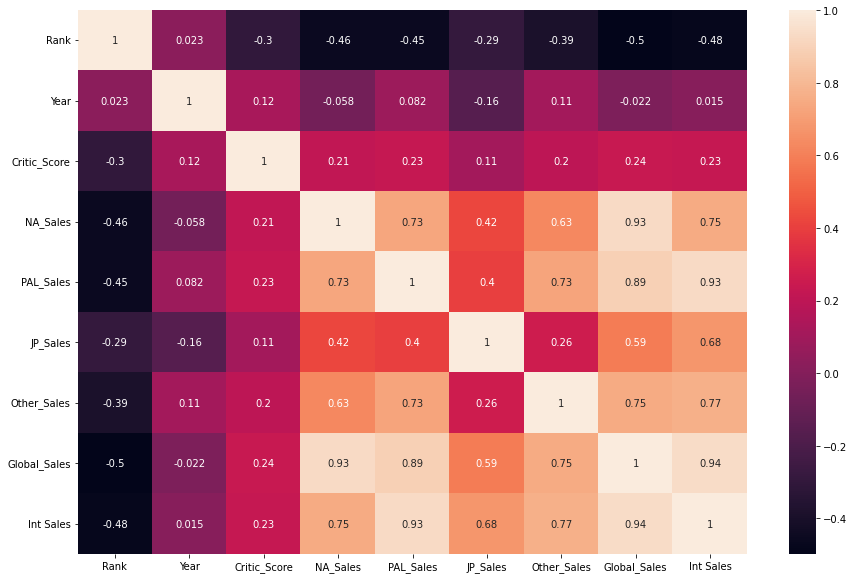

In [17]:
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(data.corr(), annot=True)

In [18]:
fig = px.scatter(data_frame = data, x="Year", y="Global_Sales", size="Global_Sales", color= "Global_Sales", trendline="ols", width=900, height=600)
fig

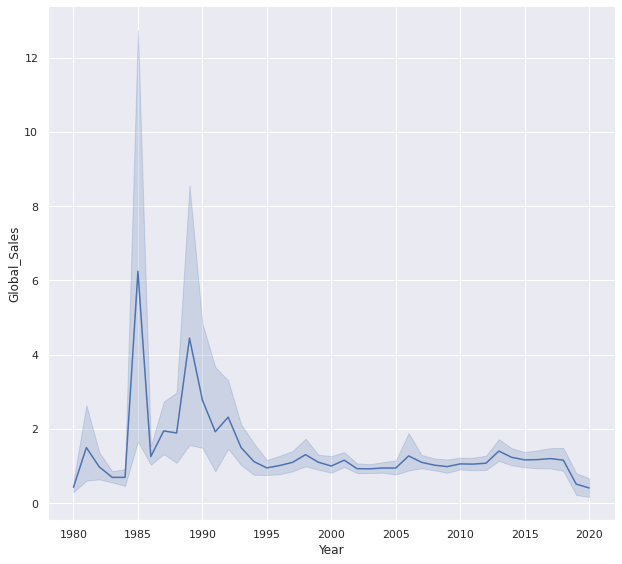

In [19]:
sns.set_theme()
sns.relplot(data=data, kind='line', x='Year', y='Global_Sales',  height = 8, aspect = 1.1)

(array([7.823e+03, 7.300e+01, 1.400e+01, 7.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e-02, 8.2740e+00, 1.6538e+01, 2.4802e+01, 3.3066e+01,
        4.1330e+01, 4.9594e+01, 5.7858e+01, 6.6122e+01, 7.4386e+01,
        8.2650e+01]),
 <a list of 10 Patch objects>)

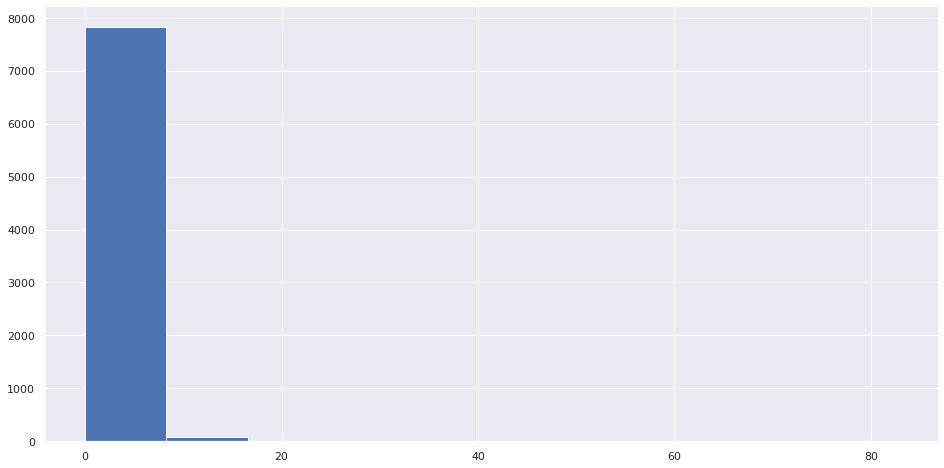

In [20]:
plt.figure(figsize = (16,8))
plt.hist(data['Global_Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7a1241a8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7a1241afa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7a1241a580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7a124266a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7a124269a0>],
 'means': []}

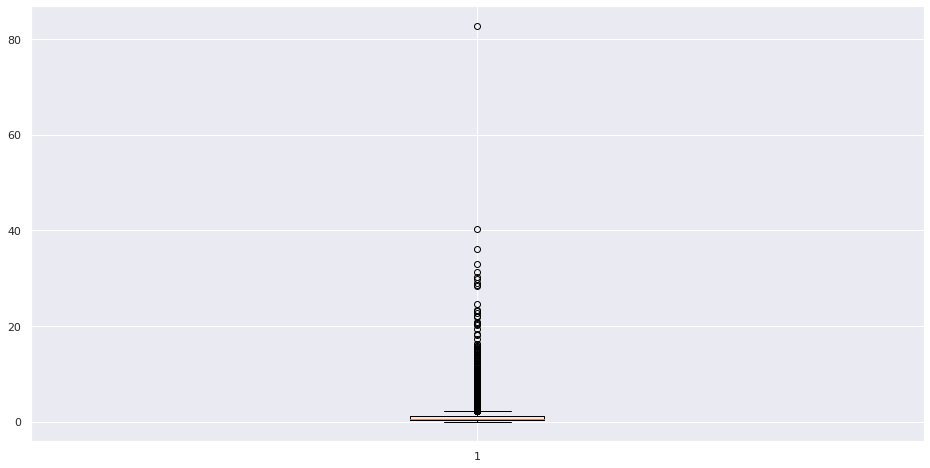

In [21]:
plt.figure(figsize = (16,8))
plt.boxplot(data['Global_Sales'])

In [22]:
fig = px.bar(data_frame = data[:20], x = 'Name', y='Global_Sales', color='Global_Sales', width=1000, height=700)
fig.show()

In [23]:
critics = data[['Critic_Score']]
critics.describe()

,Critic_Score
count,7920.000000
mean,2.944672
std,3.780156
min,0.000000
25%,0.000000
50%,0.000000
75%,7.300000
max,10.000000


In [24]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Publisher', 'Developer',
       'Critic_Score', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Int Sales'],
      dtype='object')

In [25]:
train, test = train_test_split(data, test_size= .25, random_state = 11)

### To predict Global Sales, you cannot pick any other columns than the Rank and Critic Score bc all of the other columns involve sales from there. NA, JP, and PAL sales all equate to Global so it wouldn't make sense to use those for prediction.


In [26]:
#You cannot pick any other columns other than these
x_train = train[["Rank",'Critic_Score']]
y_train = train[['Global_Sales']]

x_test = test[["Rank", 'Critic_Score']]
y_test = test[['Global_Sales']]

In [27]:
model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)

pred = model.predict(x_test)
y_lin_pred = model.predict(x_test)

print('Score: %.3f' % model.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('R2 Score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.250
Mean squared error: 3.003
R2 Score: 0.281


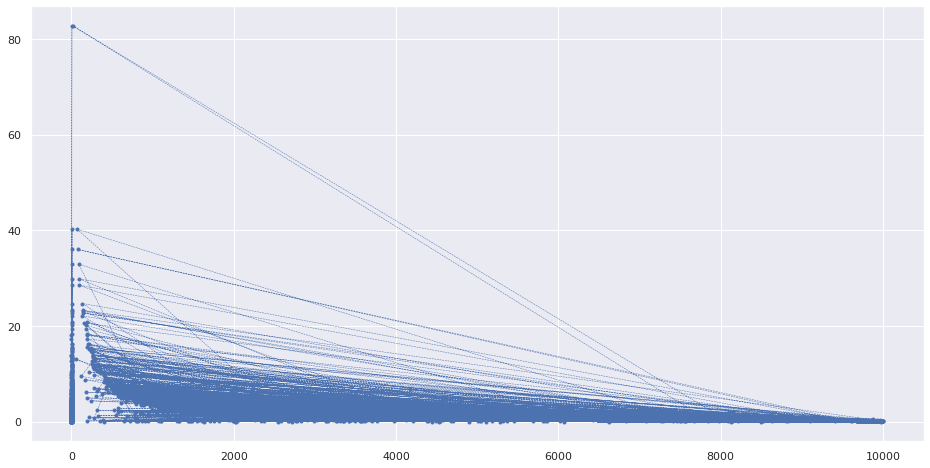

In [28]:
plt.figure(figsize= (16,8))
plt.plot(x_train, y_train,color='b',marker='o', linestyle='dashed', linewidth=.5, markersize=3) 

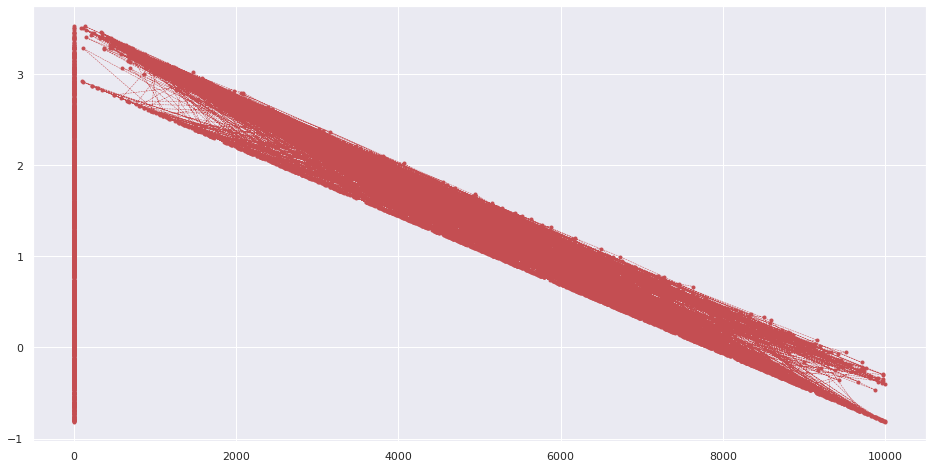

In [29]:
plt.figure(figsize= (16,8))
plt.plot(x_test, y_lin_pred,color='r',marker='o', linestyle='dashed', linewidth=.5, markersize=3) 